In [1]:
!pip install cupy-cuda115
!pip install --upgrade numba 
!pip install --upgrade tensorflow==2.11
!pip install numpy==1.22
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 MB 21.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 29.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 63.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 75.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 112.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 KB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:




import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt
import pickle
import warnings

!pip install nltk
import nltk
from nltk.stem import PorterStemmer #for stemming
from nltk.tokenize import word_tokenize
import nltk.corpus

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import svm



# !pip install 

warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.5 MB/s eta 0:00:00a 0:00:01


In [3]:
path_to_train = "train.tsv"
path_to_test = "test.tsv"
path_to_valid = "valid.tsv"
df_train = pd.read_csv(path_to_train, delimiter='\t', dtype=object)
df_test = pd.read_csv(path_to_test, delimiter='\t', dtype=object)
df_valid = pd.read_csv(path_to_valid, delimiter='\t', dtype=object)

In [4]:
df_train.fillna("", inplace=True)
df_train.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]

In [5]:
df_test.fillna("", inplace=True)
df_test.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]




In [6]:
df_valid.fillna("", inplace=True)
df_valid.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]


<AxesSubplot:xlabel='label', ylabel='count'>

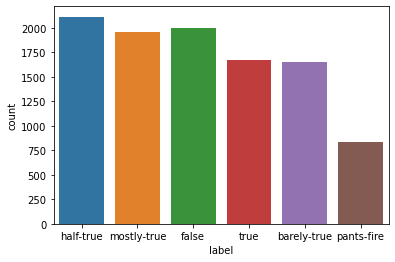

In [7]:
#plot train data
sns.countplot(x='label', data=df_train)


<AxesSubplot:xlabel='label', ylabel='count'>

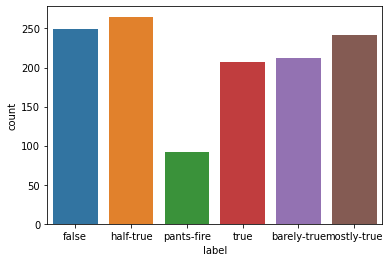

In [8]:
#plot test data 
sns.countplot(x='label', data=df_test)


<AxesSubplot:xlabel='label', ylabel='count'>

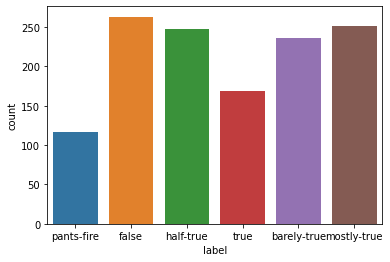

In [9]:
#plot valid data

sns.countplot(x='label', data=df_valid)

In [10]:
print("Shape of train data: ", df_train.shape)
print("Shape of test data: ", df_test.shape)
print("Shape of Validation data: ", df_valid.shape)

Shape of train data:  (10239, 14)
Shape of test data:  (1266, 14)
Shape of Validation data:  (1283, 14)


In [12]:
### Count Vectorizer 

# Convert text to word count vectors then tokenize
Vectorizer = CountVectorizer()
train_vec = Vectorizer.fit_transform(df_train['statement'].values)

# print(cvec.vocabulary_)
# print(cvec.get_feature_names())

print(train_vec.shape)
# print(type(train_cvec))

(10239, 12195)


In [16]:
### Tfidf

# Calculate inverse document frequencies and tokenize
tfidf = TfidfTransformer()
train_tfidf_vec = tfidf.fit_transform(train_vec)

tfidf.transform(train_tfidf_vec)

print(train_tfidf_vec.shape)

(10239, 12195)


In [19]:
# Tfidf with ngrams
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), use_idf=True, smooth_idf=True)
tfidf_vec_vectors = tfidf_vec.fit_transform(df_train['statement'].values)

# tfidf.vocabulary_
first_vector_tfidfvectorizer = tfidf_vec_vectors[0]

# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vec.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
started,0.313150
start started,0.229954
did decline,0.229954
started natural,0.229954
decline coal,0.229954
...,...
farm labor,0.000000
farm kids,0.000000
farm farm,0.000000
farm bureau,0.000000


In [20]:
nltk.download('treebank')
nltk.download('universal_tagset')
# POS tagging using CRF
tagged_sentence = nltk.corpus.treebank.tagged_sents(tagset='universal')
# print(len(tagged_sentence))

# load training sentences
training_sentences = df_train['statement']
# print(training_sentences)

[nltk_data] Downloading package treebank to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


In [21]:
from sklearn import metrics

In [22]:
### Implementing Random FOrest with the Count Vectorizer 

rf_pipeline_cv = Pipeline([('rfCV', Vectorizer),('rf_model', RandomForestClassifier(n_estimators=400, n_jobs=4))])
rf_pipeline_cv.fit(df_train['statement'], df_train['label'])
predictions_rf = rf_pipeline_cv.predict(df_test['statement'])
rf_cv = np.mean(predictions_rf == df_test['label'])

macro_avg_precision = metrics.precision_score(df_test['label'], predictions_rf, average = 'macro')


print(rf_cv)



0.2559241706161137


In [23]:
print(macro_avg_precision)

0.2958443795238677


In [28]:
### Implementing Random FOrest with tfdif and ngrams


rf_pipeline_tfidf = Pipeline([('rfCV', tfidf_vec),('rf_model', RandomForestClassifier(n_estimators=400, n_jobs=4))])
rf_pipeline_tfidf.fit(df_train['statement'], df_train['label'])
predictions_tfidf = rf_pipeline_tfidf.predict(df_test['statement'])
rf_tfidf = np.mean(predictions_tfidf == df_test['label'])
macro_avg_precision = metrics.precision_score(df_test['label'], predictions_rf, average = 'macro')
print(macro_avg_precision)

print(rf_tfidf)


0.2958443795238677
0.24723538704581358


In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

def kfold_cv(X_train, y_train, X_test, y_test, model, n_splits=5, random_state=42):
    
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    scores = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        X_train_fold, X_val_fold = np.array(X_train)[train_index], np.array(X_train)[test_index]
        y_train_fold, y_val_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        score = model.score(X_val_fold, y_val_fold)
        scores.append(score)
        
        cm = confusion_matrix(y_val_fold, y_pred)
        print(f"Fold {i+1} Confusion Matrix:")
        print(cm)
    
    mean_acc = np.mean(scores)
    std_acc = np.std(scores)
    
    return mean_acc, std_acc

In [37]:
kfold_cv(df_train['statement'],df_train['label'], df_valid['statement'], df_valid['label'],rf_pipeline_cv,5,42)

Fold 1 Confusion Matrix:
[[ 38 138  75  54   4  22]
 [ 29 185  87  68   3  27]
 [ 26 137 118 104   1  38]
 [ 24 107  95 133   0  51]
 [  8  80  35  22   9   4]
 [ 12  87  69  97   2  59]]
Fold 2 Confusion Matrix:
[[ 29 142  76  63   2  18]
 [ 23 191  77  71   4  19]
 [ 32 114 120 124   1  29]
 [ 25 113  79 130   1  52]
 [ 16  85  26  22  14   8]
 [ 21  92  66 108   1  54]]
Fold 3 Confusion Matrix:
[[ 39 133  77  64   2  10]
 [ 24 194  77  74   1  24]
 [ 26 147 125  99   0  26]
 [ 10 110  97 119   0  40]
 [ 12  69  25  33   9   8]
 [ 15 133  90 104   0  32]]
Fold 4 Confusion Matrix:
[[ 32 131  80  58   1  23]
 [ 24 177  81  81   2  34]
 [ 33 131 114 102   1  46]
 [ 16 112  97 129   1  51]
 [ 14  84  34  24   7  10]
 [  8  93  75  87   0  55]]
Fold 5 Confusion Matrix:
[[ 41 114  85  71   1  31]
 [ 29 193  81  77   2  35]
 [ 20 120 124 107   0  49]
 [ 15 104  93 112   1  45]
 [ 16  93  31  26  11   4]
 [ 18 104  58  89   1  46]]


(0.25773998534440645, 0.005315053458501467)

In [38]:
kfold_cv(df_train['statement'],df_train['label'], df_valid['statement'], df_valid['label'],rf_pipeline_tfidf,5,42)

Fold 1 Confusion Matrix:
[[ 34 119  71  68   4  35]
 [ 29 168  70  82  11  39]
 [ 25 145  84 121   7  42]
 [ 27 136  70 129   3  45]
 [ 17  61  28  25  16  11]
 [ 11  95  64 100   7  49]]
Fold 2 Confusion Matrix:
[[ 39 119  71  64   6  31]
 [ 32 151  80  73   6  43]
 [ 35 109  91 136   3  46]
 [ 28 121  56 127   4  64]
 [ 19  81  22  17  18  14]
 [ 29 102  44  97   4  66]]
Fold 3 Confusion Matrix:
[[ 43 101  78  65   7  31]
 [ 43 149  78  82   9  33]
 [ 31 150  99  94   3  46]
 [ 14 108  84 126   4  40]
 [ 18  63  29  26  12   8]
 [ 28 121  66 106   1  52]]
Fold 4 Confusion Matrix:
[[ 28 136  58  69   3  31]
 [ 31 160  65  91  12  40]
 [ 38 133  94 106   6  50]
 [ 21 112  73 134   4  62]
 [ 13  71  45  23  10  11]
 [ 16  96  40 102   1  63]]
Fold 5 Confusion Matrix:
[[ 39 117  78  77   6  26]
 [ 43 177  59  87   5  46]
 [ 33 128  78 121   2  58]
 [ 22 102  75 114   3  54]
 [ 17  91  16  32  10  15]
 [ 27 117  34  81   3  54]]


(0.2357647052088422, 0.0034239761471329257)

In [39]:
# Accuracy metrics
# https://www.meaningcloud.com/blog/performance-metrics-for-text-categorization
# using macro based precisiom score as a performance metric